<a href="https://colab.research.google.com/github/ShubhaVS/DataScience/blob/main/nlpsemester.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Import required libraries
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords

# Download NLTK data (if needed)
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
# Load the dataset
file_path = "/content/emails.csv"
data = pd.read_csv(file_path)

In [21]:
# Check the first few rows
print("Dataset Preview:")
print(data.head())

Dataset Preview:
                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1


In [22]:
# Separate the text and spam columns
text_column = 'text'  # Adjust column name if necessary
label_column = 'spam'  # Adjust column name if necessary

texts = data[text_column]
labels = data[label_column]


In [23]:
import nltk
# Download NLTK data (if needed)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the punkt_tab resource

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [24]:
# Text preprocessing function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Apply preprocessing to all texts

data['processed_text'] = texts.apply(preprocess_text)


In [25]:
data

,text,spam,processed_text
0,Subject: naturally irresistible your corporate...,1,"[subject, naturally, irresistible, corporate, ..."
1,Subject: the stock trading gunslinger fanny i...,1,"[subject, stock, trading, gunslinger, fanny, m..."
2,Subject: unbelievable new homes made easy im ...,1,"[subject, unbelievable, new, homes, made, easy..."
3,Subject: 4 color printing special request add...,1,"[subject, color, printing, special, request, a..."
4,"Subject: do not have money , get software cds ...",1,"[subject, money, get, software, cds, software,..."
...,...,...,...
5723,Subject: re : research and development charges...,0,"[subject, research, development, charges, gpg,..."
5724,"Subject: re : receipts from visit jim , than...",0,"[subject, receipts, visit, jim, thanks, invita..."
5725,Subject: re : enron case study update wow ! a...,0,"[subject, enron, case, study, update, wow, day..."
5726,"Subject: re : interest david , please , call...",0,"[subject, interest, david, please, call, shirl..."


In [26]:
# Create Word2Vec embeddings

model = Word2Vec(sentences=data['processed_text'], vector_size=100, window=5, min_count=1, workers=4)

# Function to create feature vectors for each text
def vectorize_text(tokens, model):
    # Get the word vectors for each token
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if vectors:
        # Return the mean of the vectors
        return np.mean(vectors, axis=0)
    else:
        # Return a zero vector if no valid words exist
        return np.zeros(model.vector_size)

# Create feature vectors for all texts

data['feature_vector'] = data['processed_text'].apply(lambda tokens: vectorize_text(tokens, model))

# Convert feature vectors into a 2D numpy array
X = np.vstack(data['feature_vector'].values)


In [18]:
data

,text,spam,processed_text,feature_vector
0,Subject: naturally irresistible your corporate...,1,"[subject, naturally, irresistible, corporate, ...","[-0.043144863, 0.12425703, 0.013188662, -0.101..."
1,Subject: the stock trading gunslinger fanny i...,1,"[subject, stock, trading, gunslinger, fanny, m...","[-0.036697283, 0.08677903, 0.06757457, 0.04322..."
2,Subject: unbelievable new homes made easy im ...,1,"[subject, unbelievable, new, homes, made, easy...","[-0.12109349, -0.059026103, -0.03390793, -0.06..."
3,Subject: 4 color printing special request add...,1,"[subject, color, printing, special, request, a...","[0.6089267, -0.59192353, -0.3281183, 0.2594145..."
4,"Subject: do not have money , get software cds ...",1,"[subject, money, get, software, cds, software,...","[-0.069650404, 0.25916567, 0.0017695442, 0.049..."
...,...,...,...,...
5723,Subject: re : research and development charges...,0,"[subject, research, development, charges, gpg,...","[-0.3939819, 0.41774398, 0.81014806, 0.4072314..."
5724,"Subject: re : receipts from visit jim , than...",0,"[subject, receipts, visit, jim, thanks, invita...","[0.005721248, -0.14159317, 0.3333351, -0.06728..."
5725,Subject: re : enron case study update wow ! a...,0,"[subject, enron, case, study, update, wow, day...","[-0.23906095, -0.09823903, 0.48092115, -0.0334..."
5726,"Subject: re : interest david , please , call...",0,"[subject, interest, david, please, call, shirl...","[-0.28624073, 0.3288884, 0.8812209, 0.2419013,..."


In [27]:
# Label encoding for the target variable

encoder = LabelEncoder()
y = encoder.fit_transform(labels)

In [28]:
# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict on the test set

y_pred = clf.predict(X_test)

In [32]:
# Display evaluation metrics
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[835  21]
 [ 20 270]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       856
           1       0.93      0.93      0.93       290

    accuracy                           0.96      1146
   macro avg       0.95      0.95      0.95      1146
weighted avg       0.96      0.96      0.96      1146




Confusion Matrix:
[[835  21]
 [ 20 270]]


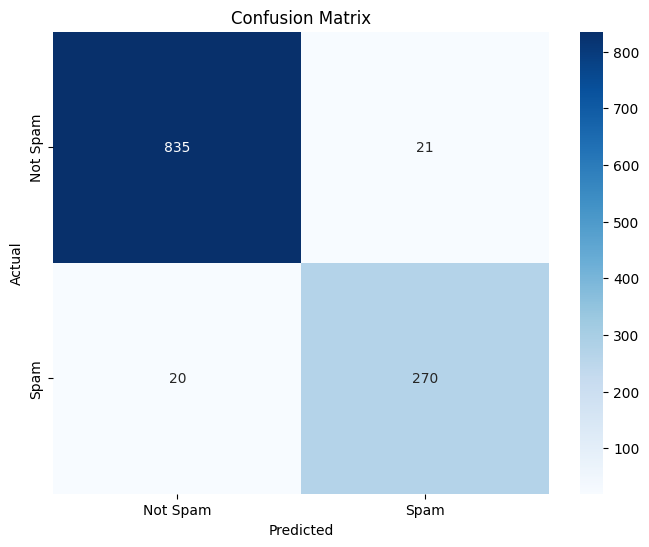


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       856
           1       0.93      0.93      0.93       290

    accuracy                           0.96      1146
   macro avg       0.95      0.95      0.95      1146
weighted avg       0.96      0.96      0.96      1146



In [31]:



# Display evaluation metrics
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Display confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Spam', 'Spam'],
            yticklabels=['Not Spam', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))